## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 2/SVM/breast-cancer-wisconsin_updated.csv")

In [2]:
data.head(5)

,id,clump_thickness,unifrmity_cell_size,Uniformity_cell_shape,marginal_adhesion,single_epi_cell,bare_nuclei,bland_chromatin,normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

In [4]:
count=data['Class'].value_counts()
count

2    458
4    241
Name: Class, dtype: int64

## Data Visualisaitons

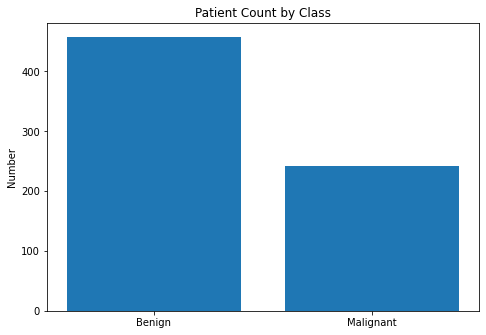

In [5]:
fig = plt.figure()
count=data['Class'].value_counts()
ax = fig.add_axes([0,0,1,1])
ax.set(xticklabels = ["Benign", "Malignant"])
outcome_ = ['2', '4']
count_bar = [count[2],count[4]]
ax.bar(outcome_,count_bar)
plt.ylabel('Number')
plt.title('Patient Count by Class')
plt.show()

Text(0.5, 1.0, 'Correlation between features')

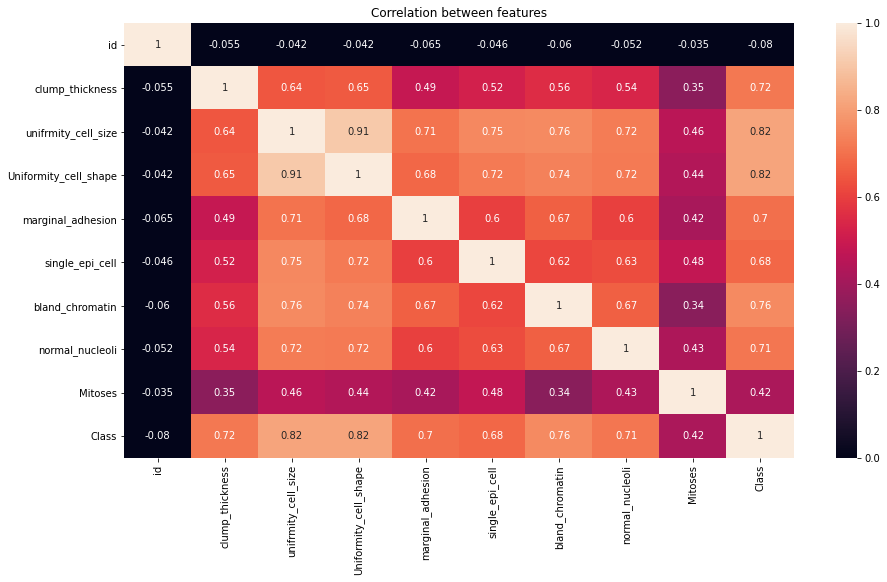

In [6]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot = True,fmt='.2g',vmin=0, vmax=1)
plt.title('Correlation between features')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58b6232320>,
      dtype=object)

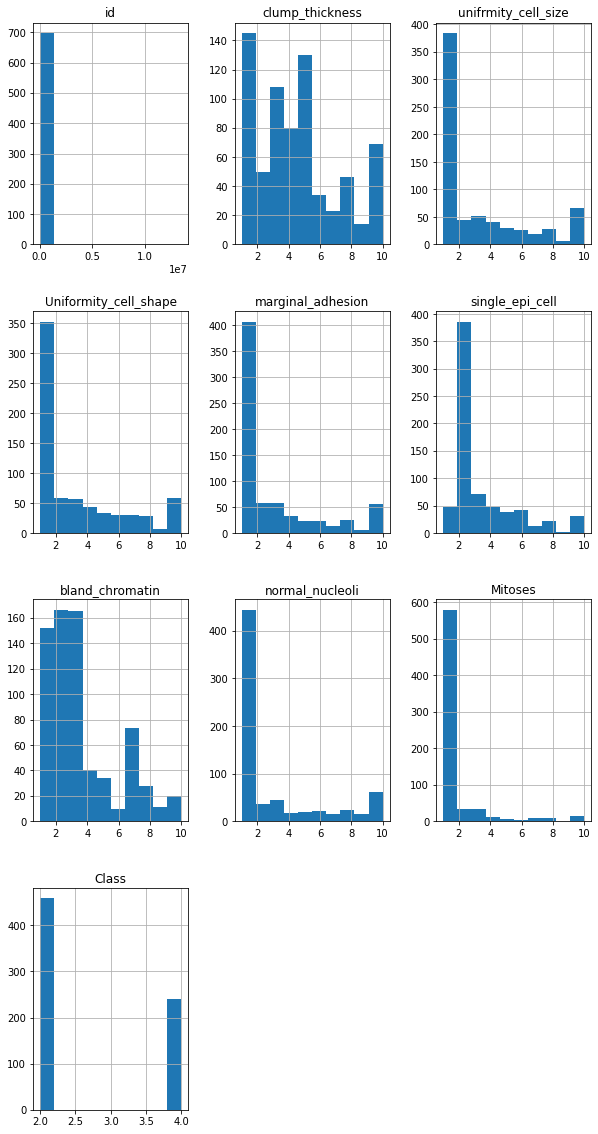

In [7]:
data.hist(figsize=(10,20))

## Data Preprocessing

In [8]:
X_data=data.drop(['id','Class','bare_nuclei'],1).values 
target=data['Class'].values

In [9]:
y_data = []
for val in target:
    if (val == 2):
        y_data.append(-1)
    else:
        y_data.append(1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.2,random_state=0)

# Model Training

In [11]:
def svm_sgd(X1, Y1):

    w = np.zeros(len(X1[0]))
    reg = 1
    epochs = 2000
    for epoch in range(1,epochs):
        X, Y = shuffle(X1, Y1)
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + reg * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + reg * (-2  *(1/epoch)* w)
    return w



In [25]:
import time
start = time.time()
w = svm_sgd(X_train,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 8.002440690994263


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
predictions = []
for data in X_test:
  pred = np.dot(data,w)
  if (pred > 1):
        predictions.append(1)
  else:
        predictions.append(-1)
print(accuracy_score(y_test,predictions))

0.8


Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

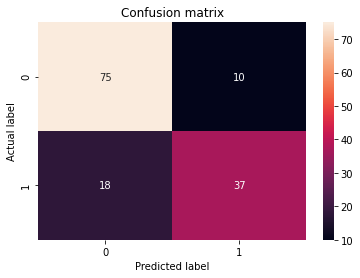

In [27]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,predictions)

pd.crosstab(np.array(y_test), np.array(predictions), rownames=['Actual'], colnames=['Predicted'], margins=True)

p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
creport = classification_report(y_test, predictions)
print("Classification report:\n",creport)


Classification report:
               precision    recall  f1-score   support

          -1       0.81      0.88      0.84        85
           1       0.79      0.67      0.73        55

    accuracy                           0.80       140
   macro avg       0.80      0.78      0.78       140
weighted avg       0.80      0.80      0.80       140



Using sklearn Library

In [16]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred_svc =model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
creport = classification_report(y_test, y_pred_svc)


In [19]:
print(accuracy_score(y_test,y_pred_svc))

0.9714285714285714


In [20]:
print("Classification report:\n",creport)


Classification report:
               precision    recall  f1-score   support

          -1       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

